<a href="https://colab.research.google.com/github/vaghasiatirth24/Machine-Learning/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, Reader, KNNBasic
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold,cross_validate

In [115]:
!pip install surprise

In [116]:
data = pd.read_csv('ratings_small.csv')
data = data[['userId', 'movieId', 'rating']]
reader = Reader(rating_scale=(1,5)) 
data = Dataset.load_from_df(data,reader)

# 3(c,d) PROBABILISTIC MATRIX FACTORIZATION

In [162]:
svd = SVD(biased=False)
scores = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'MEAN OF MAE FOR PMF UNDER 5-FOLD IS : {mean_mae}')
print(f'MEAN OF RMSE FOR PMF UNDER 5-FOLD IS: {mean_rsme}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9992  1.0083  1.0059  1.0069  1.0148  1.0070  0.0050  
MAE (testset)     0.7693  0.7780  0.7791  0.7766  0.7816  0.7769  0.0041  
Fit time          5.13    5.12    5.15    5.07    5.06    5.11    0.04    
Test time         0.26    0.14    0.25    0.14    0.15    0.19    0.05    
MEAN OF MAE FOR PMF UNDER 5-FOLD IS : 0.7769358308377965
MEAN OF RMSE FOR PMF UNDER 5-FOLD IS: 1.00702305417321


# 3(c,d) USER BASED COLLABORATIVE FILTERING

In [151]:
simi_options = {
    "user_based": True, 
}

knn_mean = KNNWithMeans(sim_options=simi_options)
scores = cross_validate(knn_mean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9274  0.9217  0.9212  0.9193  0.9080  0.9195  0.0063  
MAE (testset)     0.7093  0.7074  0.7045  0.7025  0.6955  0.7039  0.0048  
Fit time          0.19    0.24    0.24    0.24    0.24    0.23    0.02    
Test time         1.97    1.98    2.09    1.97    2.09    2.02    0.06    
Average MAE: 0.7038593528194371
Average RMSE: 0.9195151377653374


# 3(c,d) ITEM BASED COLLABORATIVE FILTERING

In [152]:
simi_options = {
    "user_based": False
}

knn_mean = KNNWithMeans(sim_options=simi_options)
scores = cross_validate(knn_mean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE : {mean_mae}')
print(f'Average RMSE : {mean_rsme}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9155  0.9073  0.9189  0.9205  0.9072  0.9139  0.0056  
MAE (testset)     0.7008  0.6950  0.7037  0.7036  0.6943  0.6995  0.0041  
Fit time          5.22    5.29    7.10    4.65    4.83    5.42    0.87    
Test time         8.66    8.71    8.77    8.56    8.71    8.68    0.07    
Average MAE : 0.6994766645659252
Average RMSE : 0.9138757809010407


# 3(e) FOR USER BASED

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9264  0.9242  0.9188  0.9148  0.9288  0.9226  0.0051  
MAE (testset)     0.7090  0.7074  0.7048  0.7006  0.7130  0.7070  0.0041  
Fit time          0.44    0.48    0.51    0.49    0.49    0.48    0.02    
Test time         2.09    1.93    1.95    2.07    2.01    2.01    0.07    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

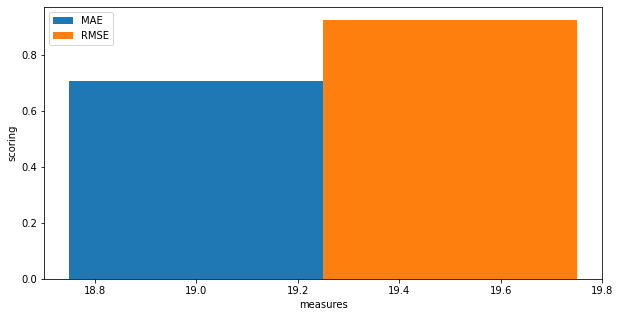

In [161]:
ub_mae = []
ub_rmse=[]

measures = ['cosine', 'MSD', 'pearson_baseline']
for similarity in measures:
    
    simi_options = {
    "name": similarity,
    "user_based": True, 
    }
    
    knn_mean = KNNWithMeans(sim_options=simi_options)
    scores = cross_validate(knn_mean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    ub_mae.append(mean_mae)
    ub_rmse.append(mean_rsme)

plt.figure(figsize=(10,5))
plt.bar(i, ub_mae, 0.5, label='MAE')
plt.bar(i + 0.5, ub_rmse, 0.5, label='RMSE')
plt.xlabel('measures')
plt.ylabel('scoring')
plt.legend(loc='best')
plt.show()

# 3(e) FOR ITEM BASED

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9064  0.9142  0.9244  0.9197  0.9258  0.9181  0.0071  
MAE (testset)     0.6938  0.7011  0.7083  0.7028  0.7088  0.7030  0.0055  
Fit time          0.20    0.23    0.25    0.23    0.25    0.23    0.02    
Test time         2.01    2.09    1.96    1.95    2.08    2.02    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

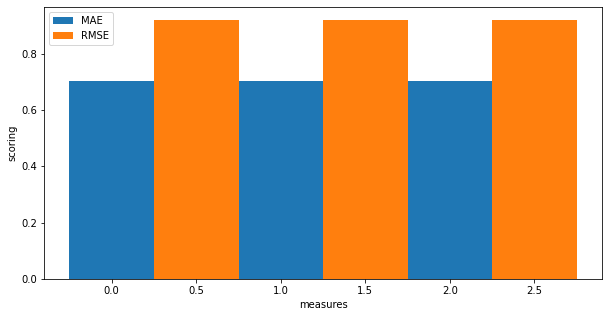

In [121]:
ib_mae = []
ib_rmse = []

measures = ['cosine', 'MSD', 'pearson_baseline']
for similarity in measures:
    
    similarity_options = {
    "name": similarity,
    "user_based": False,
    }
    
    knn_mean = KNNWithMeans(similarity_options=similarity_options)
    scores = cross_validate(knn_mean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    ib_mae.append(mean_mae)
    ib_rmse.append(mean_rsme)
    
i = np.arange(len(measures))

plt.figure(figsize=(10,5))
plt.bar(i, ib_mae, 0.5, label='MAE')
plt.bar(i + 0.5, ib_rmse, 0.5, label='RMSE')
plt.xlabel('measures')
plt.ylabel('scoring')
plt.legend(loc='best')
plt.show()

# 3(E) IMPACT OF METRICS ON ITEM AND USER BASED COLLAB. FILTERING 

<Figure size 432x288 with 0 Axes>

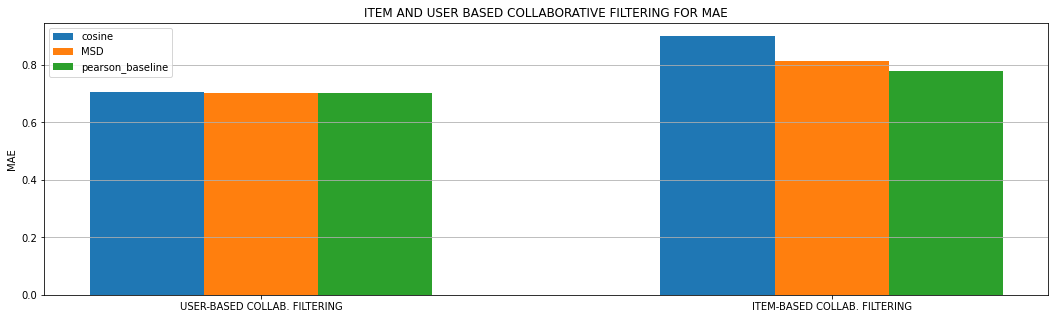

In [165]:
ifig=1
labels = ['USER-BASED COLLAB. FILTERING', 'ITEM-BASED COLLAB. FILTERING']
x = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5
plt.figure(ifig)
fig, ax = plt.subplots(figsize=(18,5))
for i in range(len(measures)):
    ax.bar(x - (width * len(measures)) / 2 + i * width, [ub_mae[i], ib_mae[i]], width, label=measures[i])
plt.xticks(x - width / 2, labels)
plt.title('ITEM AND USER BASED COLLABORATIVE FILTERING FOR MAE')
plt.ylabel('MAE')
plt.grid(axis='y')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

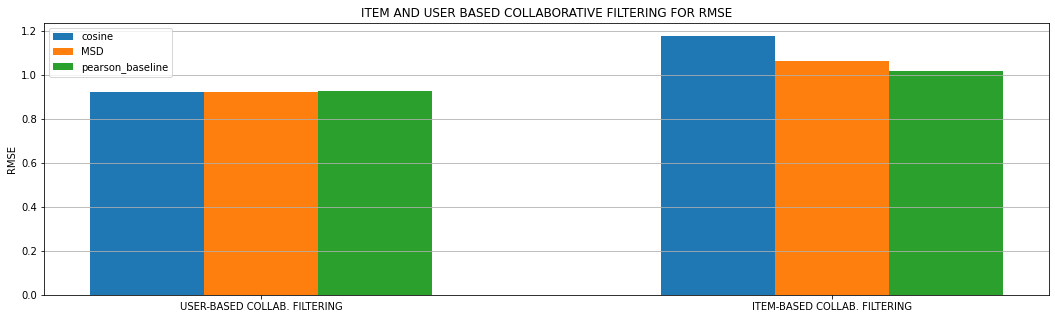

In [166]:
ifig=1
labels = ['USER-BASED COLLAB. FILTERING', 'ITEM-BASED COLLAB. FILTERING']
x = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5
plt.figure(ifig)
fig, ax = plt.subplots(figsize=(18,5))
for i in range(len(measures)):
    ax.bar(x - (width * len(measures)) / 2 + i * width, [ub_rmse[i], ib_rmse[i]], width, label=measures[i])
plt.xticks(x - width / 2, labels)
plt.title('ITEM AND USER BASED COLLABORATIVE FILTERING FOR RMSE')
plt.ylabel('RMSE')
plt.grid(axis='y')
plt.legend()
plt.show()

# 3(f) IMPACT USING NO. OF NEIGHBOURS(KNN)




In [168]:
kn = np.arange(1, 20, 1)
ub_mae = []
ub_rmse = []

for i in kn: 
    simi_options = {
    "user_based": True, 
    }
    
    knn_mean = KNNWithMeans(i, sim_options=simi_options)
    scores = cross_validate(knn_mean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    ub_mae.append(mean_mae)
    ub_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1389  1.1419  1.1475  1.1515  1.1443  1.1448  0.0044  
MAE (testset)     0.8804  0.8829  0.8837  0.8867  0.8821  0.8832  0.0021  
Fit time          0.21    0.26    0.26    0.25    0.24    0.24    0.02    
Test time         1.04    1.12    1.03    1.00    1.13    1.06    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [154]:
ib_mae = []
ib_rmse = []

for i in kn: 
    simi_options = {
    "user_based": False,  
    }
    
    knn_mean = KNNWithMeans(i, sim_options=simi_options)
    scores = cross_validate(knn_mean, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    ib_mae.append(mean_mae)
    ib_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1722  1.1846  1.1660  1.1708  1.1850  1.1757  0.0077  
MAE (testset)     0.9006  0.9051  0.8944  0.8964  0.9075  0.9008  0.0050  
Fit time          4.72    4.59    4.65    4.71    4.72    4.68    0.05    
Test time         6.16    6.15    6.10    6.20    6.11    6.14    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

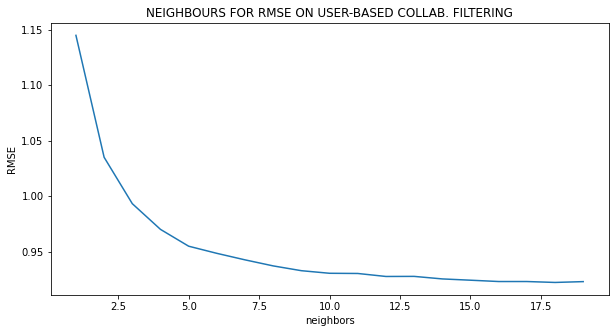

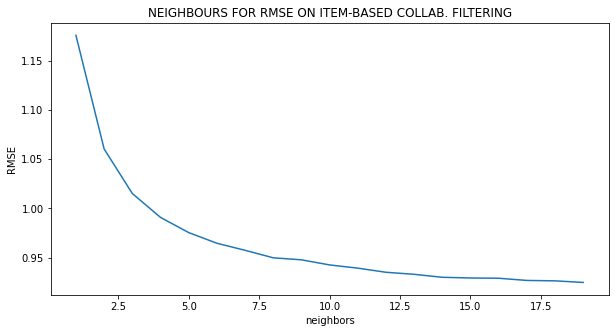

In [169]:
plt.figure(figsize=(10,5))
plt.plot(kn, ub_rmse)
plt.title('NEIGHBOURS FOR RMSE ON USER-BASED COLLAB. FILTERING')
plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(kn, ib_rmse)
plt.title('NEIGHBOURS FOR RMSE ON ITEM-BASED COLLAB. FILTERING')
plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show()

3(G) BEST NUMBER OF NEIGHBOURS

In [170]:
print('USER-BASED COLLAB. FILTERING - MAE')
print('Best K: ', kn[np.argmin(ub_mae)])
print('Best K MAE: ', np.min(ub_mae))

print('\nUSER-BASED COLLAB. FILTERING - RMSE')
print('Best K: ', kn[np.argmin(ub_rmse)])
print('Best K RMSE: ', np.min(ub_rmse))

print('\nITEM-BASED COLLAB. FILTERING - MAE')
print('Best K: ', kn[np.argmin(ib_mae)])
print('Best K MAE: ', np.min(ib_mae))

print('\nITEM-BASED COLLAB. FILTERING - RMSE')
print('Best K: ', kn[np.argmin(ib_rmse)])
print('Best K RMSE: ', np.min(ib_rmse))


USER-BASED COLLAB. FILTERING - MAE
Best K:  18
Best K MAE:  0.7076798402259414

USER-BASED COLLAB. FILTERING - RMSE
Best K:  18
Best K RMSE:  0.9224289692338251

ITEM-BASED COLLAB. FILTERING - MAE
Best K:  19
Best K MAE:  0.7097096917245098

ITEM-BASED COLLAB. FILTERING - RMSE
Best K:  19
Best K RMSE:  0.9249267223223878
